Progetto laboratorio di programmazione. Gruppo: Nicolò Cioni, Rossano Gilioli e Salvatore Russo. Dataset scelto : dataset n 1

Preparazione dell'ambiente

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm, tree
from sklearn.metrics import *
test= pd.read_csv("/content/sample_data/1.test_convertito_numerici.csv", sep=",")
test_non = pd.read_csv("/content/sample_data/1.test_non_convertito.csv", sep=",")
train_non = pd.read_csv("/content/sample_data/1.train_non_convertito.csv", sep=",")
train = pd.read_csv("/content/sample_data/1.train_convertito_numerici.csv", sep=",")

# **Fase 1: descrizione e prima analisi del dataset**

# **Domanda** **n.1.1**:

---



 Come si presentano inizialmente i dataset? Quanti casi prensentano? Quante
variabili? Sono presenti valori nulli? Come sono divise le variabili (numeriche/categoriche/temporali). Qual è la media generale delle cancellazioni?

In [3]:
print("Train dataset info:")
train.describe()

Train dataset info:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
count,56707.000000,56707.000000,56707.000000,56707.0,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000,...,56707.000000,56707.00000,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000
mean,0.327420,0.358633,102.870369,2016.0,6.767313,28.458162,15.911104,0.893981,2.442802,1.850988,...,1.349075,0.22484,0.124429,71.445095,8.487435,3.833865,2.171302,98.325863,0.068334,0.548645
std,0.469276,0.479603,106.582358,0.0,3.194300,13.925493,8.784897,0.983110,1.863548,0.498133,...,1.887103,0.66649,0.337000,102.585427,47.550647,23.785668,0.477327,49.955696,0.253296,0.761173
min,0.000000,0.000000,0.000000,2016.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,17.000000,2016.0,4.000000,17.000000,8.000000,0.000000,1.000000,2.000000,...,0.000000,0.00000,0.000000,7.000000,-1.000000,0.000000,2.000000,68.530000,0.000000,0.000000
50%,0.000000,0.000000,68.000000,2016.0,7.000000,28.000000,16.000000,1.000000,2.000000,2.000000,...,0.000000,0.00000,0.000000,9.000000,-1.000000,0.000000,2.000000,90.950000,0.000000,0.000000
75%,1.000000,1.000000,160.000000,2016.0,10.000000,41.000000,24.000000,2.000000,3.000000,2.000000,...,3.000000,0.00000,0.000000,134.000000,-1.000000,0.000000,2.000000,120.000000,0.000000,1.000000
max,1.000000,1.000000,709.000000,2016.0,12.000000,53.000000,31.000000,19.000000,50.000000,4.000000,...,11.000000,21.00000,2.000000,481.000000,499.000000,391.000000,3.000000,5400.000000,3.000000,5.000000


In [4]:
print("Test dataset info:")
test.describe()

Test dataset info:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
count,40687.000000,40687.000000,40687.000000,40687.0,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000,...,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000
mean,0.323912,0.386979,109.259223,2017.0,4.709784,18.630373,15.717576,0.973308,2.601543,1.877995,...,1.386168,0.239438,0.102736,83.233047,12.665544,0.235186,2.109961,114.637950,0.054981,0.676506
std,0.467973,0.487065,107.940953,0.0,2.160014,9.422475,8.789609,1.014337,1.973291,0.496172,...,1.907991,0.683429,0.305795,116.963712,65.972486,4.458834,0.454108,52.256304,0.235894,0.846531
min,0.000000,0.000000,0.000000,2017.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,0.000000,23.000000,2017.0,3.000000,11.000000,8.000000,0.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,9.000000,-1.000000,0.000000,2.000000,80.000000,0.000000,0.000000
50%,0.000000,0.000000,80.000000,2017.0,5.000000,19.000000,16.000000,1.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,9.000000,-1.000000,0.000000,2.000000,107.100000,0.000000,0.000000
75%,1.000000,1.000000,164.500000,2017.0,7.000000,26.000000,23.000000,2.000000,3.000000,2.000000,...,3.000000,0.000000,0.000000,229.000000,-1.000000,0.000000,2.000000,140.000000,0.000000,1.000000
max,1.000000,1.000000,629.000000,2017.0,8.000000,35.000000,31.000000,16.000000,40.000000,4.000000,...,11.000000,18.000000,2.000000,535.000000,543.000000,223.000000,3.000000,510.000000,8.000000,5.000000


In [5]:
tot_train =  56707

In [6]:
tot_test= 40687

 **Risposta n.1:**

---


Ii dataset si presentano con 56707 casi per il "*train dataset*" e
40687 per il "*test dataset*". Le colonne sono 30 per entrambi. I valori sono perlopiù categorici (14/30), infatti,  molti dei valori segnati come "*int*" in realtà sono la conversione in numero di "Si" e "No"(es: "*is_canceled*"), le temporali e le numeriche si dividono invece rispettivamente in 3/30 e 13/30. In entrambi i dateset non sembrano essere presenti valori nulli. La media delle cancellazioni è del 36% nel train dataset e del 39% nel secondo.

# **Domanda n.1.2**:

---


Come si distribuisce il valore relativo al numero di persone? Quante prenotazioni includono bambini e quanti ospiti sono, invece,  da soli?

In [7]:
train["persone"] = train["babies"] + train["children"] + train["adults"]
print(train["persone"].mean())
test["persone"] = test["babies"] + test["children"] + test["adults"]
print(test["persone"].mean())

1.9633378595235156
2.0107405313736573


In [8]:
bambini_tr = train["babies"].value_counts()
print(bambini_tr)

0     56261
1       437
2         8
10        1
Name: babies, dtype: int64


In [9]:
bambini_te = test["babies"].value_counts()
print(bambini_te)

0    40429
1      253
2        5
Name: babies, dtype: int64


In [10]:
ragazzi_tr = train["children"].value_counts()
print(ragazzi_tr)

0.0    52578
1.0     2384
2.0     1711
3.0       34
Name: children, dtype: int64


In [11]:
ragazzi_te = test["children"].value_counts()
print(ragazzi_te)

0.0    37137
1.0     1999
2.0     1514
3.0       37
Name: children, dtype: int64


In [12]:
ragazzi_tot_tr = 2384+1711+34
ragazzi_tot_te= 1999+1514+37
bambini_tot_tr = 437+ 8 + 1
bambini_tot_te = 253 + 5
numero_famgilie_tr = ragazzi_tot_tr + bambini_tot_tr
numero_famgilie_te  =ragazzi_tot_te + bambini_tot_te
print("n. ragazzi nel train: ",ragazzi_tot_tr)
print("n. ragazzi nel test: ",ragazzi_tot_te)
print("n. bambini nel train: ",bambini_tot_tr)
print("n. bambini nel test: ",bambini_tot_te)
print("n. prenotazioni con non adulti neel train: ",numero_famgilie_tr)
print("n. prenotazioni con non adulti nel test: ", numero_famgilie_te)


n. ragazzi nel train:  4129
n. ragazzi nel test:  3550
n. bambini nel train:  446
n. bambini nel test:  258
n. prenotazioni con non adulti neel train:  4575
n. prenotazioni con non adulti nel test:  3808


In [13]:
train["colonna_bambini"] = train["babies"] + train["children"]
bambini_rag_tr = train["colonna_bambini"].value_counts()
print(bambini_rag_tr)

0.0     52211
1.0      2678
2.0      1768
3.0        49
10.0        1
Name: colonna_bambini, dtype: int64


In [14]:
test["colonna_bambini"] = test["babies"] + test["children"]
bambini_rag_te = test["colonna_bambini"].value_counts()
print(bambini_rag_te)

0.0    36941
1.0     2136
2.0     1565
3.0       45
Name: colonna_bambini, dtype: int64


In [15]:
media_canc_bambini_tr = train.groupby(train["colonna_bambini"])["is_canceled"].mean()
print(media_canc_bambini_tr)

colonna_bambini
0.0     0.360020
1.0     0.305078
2.0     0.400452
3.0     0.306122
10.0    0.000000
Name: is_canceled, dtype: float64


In [16]:
media_canc_bambini_te=test.groupby(test["colonna_bambini"])["is_canceled"].mean()
print(media_canc_bambini_te)

colonna_bambini
0.0    0.385859
1.0    0.352060
2.0    0.466454
3.0    0.200000
Name: is_canceled, dtype: float64


In [17]:
persone_tr = train["persone"].value_counts().sort_index()
print(persone_tr)

0.0        84
1.0     10967
2.0     38563
3.0      5189
4.0      1852
5.0        51
12.0        1
Name: persone, dtype: int64


In [18]:
persone_te = test["persone"].value_counts().sort_index()
print(persone_te)

0.0       67
1.0     7181
2.0    27455
3.0     4282
4.0     1636
5.0       66
Name: persone, dtype: int64


In [19]:
media_canc_persone_tr=train.groupby(train["persone"])["is_canceled"].mean()
print(media_canc_persone_tr)

persone
0.0     0.154762
1.0     0.301176
2.0     0.380468
3.0     0.305454
4.0     0.405508
5.0     0.254902
12.0    0.000000
Name: is_canceled, dtype: float64


In [20]:
media_canc_persone_te =test.groupby(test["persone"])["is_canceled"].mean()
print(media_canc_persone_te)

persone
0.0    0.164179
1.0    0.290071
2.0    0.409033
3.0    0.380897
4.0    0.473105
5.0    0.242424
Name: is_canceled, dtype: float64


In [21]:
prenotazioni_fallaci_tr= train[(train["adults"]== 0) & (train["children"]== 0)]
print(prenotazioni_fallaci_tr)

       hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
389        1            1          0               2016                   2   
5638       1            1          0               2016                  11   
18555      1            0         31               2016                  12   
19312      0            1          1               2016                   2   
19326      0            0          0               2016                   2   
...      ...          ...        ...                ...                 ...   
55556      0            0          0               2016                  12   
56000      0            0          0               2016                  12   
56053      0            0          0               2016                  12   
56443      0            0        255               2016                  12   
56703      0            0        177               2016                  12   

       arrival_date_week_number  arrival_date_day_o

In [22]:
prenotazioni_fallaci_te = test[(test["adults"]== 0) & (test["children"]== 0)]
print(prenotazioni_fallaci_te)

       hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
5148       1            0          4               2017                   1   
5946       1            0         46               2017                   1   
7968       1            0         15               2017                   3   
7974       1            0         15               2017                   3   
10578      1            0          1               2017                   6   
...      ...          ...        ...                ...                 ...   
36326      0            0        107               2017                   6   
36388      0            0          1               2017                   6   
37548      0            0         44               2017                   7   
37831      0            0          2               2017                   7   
38384      0            0        170               2017                   7   

       arrival_date_week_number  arrival_date_day_o

**Risposta n.2** :

---

* La media relativa al numero di persone è di circa 2 persone in entrambi i dataset e rappresenta anche il caso più rappresentato (38563 prenotazioni da 2 persone nel train dataset e 27455 nel test dataset)
* Il numero di prenotazioni composte da un numero qualsiasi di adulti con almeno un bambino ("*babies*" e/o "*children*") è relativamente basso in entrambi i dataset: 4575 (con 4129 con almeno un "*child*" e 446 con almeno un "*baby*") per il train e 3808 (con 3550 con almeno un "*child*" e 258 con almeno un "*baby*") per il test .
* Il numero massimo di bambini è di 10 raggiunto però in un singolo caso del "train dataset". Escludendo quello il massimo di bambini a seguito è di 3.
* La percentuale delle cancellazioni scende per le prenotazioni con solamente un "non adulto" e torna a salire per le prenotazioni con 2 a seguito (le prenotazioni con 3 "non adulti" sono così poche da non essere rilevanti).
* Escludendo suddetto caso estremo il numero massimo di persone per una singola camera è 5.
* La media delle cancellazioni cambia in base al numero di persone ma l'aumentare del numero di persone non aumenta questa media in modo lineare (prenotazioni da 3 componenti cancellano in media meno che prenotazioni da 2 e da 4).
* In entrambi i dataset poi sono presenti valori anomali corrispondenti a 0 persone per camera (84 nel train e 67 nel test) alcune prenotazioni invece contengono i casi con 0 adulti ma almeno un "*children*" quindi non si può sapere se siano valide o meno.
* Il numero di viaggiatori "solitari" è invece cospicuo e simile in entrambi i dataset (10967 nel train e 7181 nel test).
Il numero di adulti per prenotazione varia da un minomo di 1 fino a un massimo di 4.



# **Domanda n.1.3**:

---


Come si sono divisi i casi in base al segmento di mercato e alla distribuzione? Come cambia la media relativa al numero di cancellazioni?

In [138]:
mercato_tr= train_non["market_segment"].value_counts().sort_index()
print(mercato_tr)

Aviation           127
Complementary      364
Corporate         2562
Direct            5663
Groups            7857
Offline TA/TO    12473
Online TA        27661
Name: market_segment, dtype: int64


In [139]:
per_merc_tr = (mercato_tr/ len(train_non) * 100).sort_index()
print(per_merc_tr)

Aviation          0.223958
Complementary     0.641896
Corporate         4.517961
Direct            9.986421
Groups           13.855432
Offline TA/TO    21.995521
Online TA        48.778810
Name: market_segment, dtype: float64


In [140]:
mercato_te = test_non["market_segment"].value_counts().sort_index()
print(mercato_te)

Aviation           110
Complementary      214
Corporate         1562
Direct            4629
Groups            5854
Offline TA/TO     5667
Online TA        22651
Name: market_segment, dtype: int64


In [141]:
per_merc_te= (mercato_te / len(test_non) * 100).sort_index()
print(per_merc_te)

Aviation          0.270357
Complementary     0.525967
Corporate         3.839064
Direct           11.377098
Groups           14.387888
Offline TA/TO    13.928282
Online TA        55.671345
Name: market_segment, dtype: float64


In [142]:
distribuzione_tr= train_non["distribution_channel"].value_counts().sort_index()
print(mercato_tr)

Aviation           127
Complementary      364
Corporate         2562
Direct            5663
Groups            7857
Offline TA/TO    12473
Online TA        27661
Name: market_segment, dtype: int64


In [143]:
per_distribuzione_tr = (distribuzione_tr/ len(train_non) * 100).sort_index()
print(per_distribuzione_tr)

Corporate     5.805280
Direct       11.989701
GDS           0.183399
TA/TO        82.021620
Name: distribution_channel, dtype: float64


In [144]:
distribuzione_te= test_non["distribution_channel"].value_counts().sort_index()
print(distribuzione_te)

Corporate     1921
Direct        5061
GDS             88
TA/TO        33617
Name: distribution_channel, dtype: int64


In [145]:
per_distribuzione_te = (distribuzione_te/ len(test) * 100).sort_index()
print(per_distribuzione_te)

Corporate     4.721410
Direct       12.438863
GDS           0.216285
TA/TO        82.623442
Name: distribution_channel, dtype: float64


In [146]:
canc_mercato_tr = train_non.groupby(train_non["market_segment"])["is_canceled"].mean()
print(canc_mercato_tr)

market_segment
Aviation         0.228346
Complementary    0.129121
Corporate        0.146370
Direct           0.153099
Groups           0.617539
Offline TA/TO    0.347150
Online TA        0.355627
Name: is_canceled, dtype: float64


In [147]:
canc_mercato_te = test_non.groupby(test_non["market_segment"])["is_canceled"].mean()
print(canc_mercato_te)

market_segment
Aviation         0.209091
Complementary    0.163551
Corporate        0.254802
Direct           0.154677
Groups           0.581141
Offline TA/TO    0.337745
Online TA        0.408680
Name: is_canceled, dtype: float64


In [148]:
canc_distribuzione_tr = train_non.groupby(train_non["distribution_channel"])["is_canceled"].mean()
print(canc_distribuzione_tr)

distribution_channel
Corporate    0.183475
Direct       0.171790
GDS          0.211538
TA/TO        0.398671
Name: is_canceled, dtype: float64


In [149]:
canc_distribuzione_te = test_non.groupby(test_non["distribution_channel"])["is_canceled"].mean()
print(canc_distribuzione_te)

distribution_channel
Corporate    0.258199
Direct       0.175855
GDS          0.170455
TA/TO        0.426689
Name: is_canceled, dtype: float64


**Risposta n.1.3**:  
* I valori relativi al segmento di mercato e il canale di distribuzione sembrano più o meno omogenei nei due dataset.
* Sia per quanto riguarda il segmento di mercato che il canale di distribuzione c'è una netta maggioranza per quanto riguarda i "*Travel Agents*" (sia online che offline ma con una netta preferenza per l'online per quanto riguarda il segmento di mercato).
* Per quanto riguarda il segmento di mercato "*Aviation*" e "*complementary*" hanno un numero di casi estremamente basso (neanche l'1%) e "*Groups*", "*Direct*" e "*Corporate*" non raggiungono insieme nemmeno il 30% dei casi.
* La distribuzione invece si distribuisce quasi totalmente sui "*Travel Agents*" che raggiungono in entrambi i dataset più dell'80% dei casi.
* Per il segmento di mercato la media delle cancellazioni è praticamente raddoppiata (rispetto a quella generale) per il valore "Groups" mentre è quasi la metà per "*Direct*".
* Un po' più alta rispetto alla media generale la media relativa alle cancellazioni per il valore "*TA/TO*" mentre molto più basse quelle degli altri valori.


# **Domanda n.1.4:**

---


Come si distribuisce il valore delle prenotazioni precedenti (cancellate e non) e come aver già prenotato presso l'hotel influisce sulla media delle cancellazioni? Esiste una differenza, per quanto riguarda la media delle cancellazioni, tra avere già avuto una prenotazione non cancellata e una cancellazione?

In [41]:
cancellazioni_tr = train["previous_cancellations"].value_counts().sort_index()
print(cancellazioni_tr)

0     54936
1      1595
2        48
3        51
4        12
5        13
6         7
11       33
13       12
Name: previous_cancellations, dtype: int64


In [42]:
canc_prec_tot_train = tot_train - 54936
print(canc_prec_tot_train)

1771


In [43]:
cancellazioni_te = test["previous_cancellations"].value_counts()
print(cancellazioni_te)

0    40409
1      195
2       37
4       19
6       15
3        6
5        6
Name: previous_cancellations, dtype: int64


In [44]:
canc_prec_tot_test = tot_test - 40409
print(canc_prec_tot_test)

278


In [45]:
non_cancellazioni_tr = train["previous_bookings_not_canceled"].value_counts().sort_index()
print(non_cancellazioni_tr)

0     54827
1       777
2       289
3       183
4       138
5       110
6        62
7        43
8        36
9        27
10       22
11       18
12       15
13       10
14       11
15       11
16       10
17        9
18        9
19        8
20        9
21        9
22        9
23        4
24        4
25       11
26        2
27        4
28        3
29        3
30        2
31        2
32        2
33        1
34        1
35        1
36        1
37        1
38        1
39        1
40        1
41        1
42        1
43        1
44        2
45        1
46        1
47        1
48        2
49        1
50        1
51        1
52        1
53        1
54        1
55        1
56        1
57        1
58        1
Name: previous_bookings_not_canceled, dtype: int64


In [46]:
non_canc_tot_tr = tot_train - 54827
print(non_canc_tot_tr)

1880


In [47]:
non_cancellazioni_te = test["previous_bookings_not_canceled"].value_counts().sort_index()
print(non_cancellazioni_te)

0     39259
1       590
2       231
3       122
4        80
5        60
6        46
7        39
8        30
9        30
10       29
11       23
12       21
13       19
14       16
15       10
16       10
17        7
18        5
19        5
20        3
21        3
22        1
23        3
24        5
25        6
26        5
27        5
28        4
29        3
30        2
58        1
59        1
60        1
61        1
62        1
63        1
64        1
65        1
66        1
67        1
68        1
69        1
70        1
71        1
72        1
Name: previous_bookings_not_canceled, dtype: int64


In [48]:
non_canc_tot_te = tot_test - 39259
print(non_canc_tot_te)

1428


In [49]:
train["prenotazioni_precedenti"] = train["previous_bookings_not_canceled"] + train["previous_cancellations"]
prenotazioni_tr = train["prenotazioni_precedenti"].value_counts().sort_index()
print(prenotazioni_tr)

0     53380
1      2162
2       302
3       179
4       125
      ...  
59        1
60        1
61        1
62        1
64        1
Name: prenotazioni_precedenti, Length: 63, dtype: int64


In [50]:
pren_prec_tot_train= tot_train - 53380
print(pren_prec_tot_train)

3327


In [51]:
test["prenotazioni_precedenti"] = test["previous_bookings_not_canceled"] + test["previous_cancellations"]
prenotazioni_te = test["prenotazioni_precedenti"].value_counts().sort_index()
print(prenotazioni_te)

0     39253
1       570
2       236
3       122
4        89
5        58
6        47
7        31
8        32
9        31
10       26
11       23
12       21
13       18
14       18
15       15
16       14
17       10
18        5
19        5
20        5
21        3
22        2
23        3
24        5
25        6
26        4
27        5
28        4
29        3
30        3
31        2
32        1
33        1
34        1
64        1
65        1
66        1
67        1
68        1
69        1
70        1
71        1
72        1
73        1
74        1
75        1
76        1
77        1
78        1
Name: prenotazioni_precedenti, dtype: int64


In [52]:
pren_prec_tot_test= tot_test - 39253
print(pren_prec_tot_test)

1434


In [53]:
media_canc_non_canc_tr=train.groupby(train["previous_bookings_not_canceled"])["is_canceled"].mean()
print(media_canc_non_canc_tr)

previous_bookings_not_canceled
0     0.368924
1     0.055341
2     0.038062
3     0.043716
4     0.072464
5     0.081818
6     0.048387
7     0.023256
8     0.055556
9     0.000000
10    0.136364
11    0.111111
12    0.200000
13    0.000000
14    0.000000
15    0.181818
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
24    0.000000
25    0.727273
26    0.000000
27    0.250000
28    0.000000
29    0.333333
30    0.000000
31    0.000000
32    0.000000
33    0.000000
34    0.000000
35    0.000000
36    0.000000
37    0.000000
38    0.000000
39    0.000000
40    0.000000
41    0.000000
42    0.000000
43    0.000000
44    0.500000
45    0.000000
46    0.000000
47    0.000000
48    0.500000
49    0.000000
50    0.000000
51    0.000000
52    0.000000
53    0.000000
54    0.000000
55    0.000000
56    0.000000
57    0.000000
58    1.000000
Name: is_canceled, dtype: float64


In [54]:
media_canc_non_canc_te =test.groupby(test["previous_bookings_not_canceled"])["is_canceled"].mean()
print(media_canc_non_canc_te)

previous_bookings_not_canceled
0     0.399272
1     0.049153
2     0.060606
3     0.040984
4     0.025000
5     0.016667
6     0.000000
7     0.076923
8     0.033333
9     0.000000
10    0.137931
11    0.130435
12    0.000000
13    0.105263
14    0.125000
15    0.000000
16    0.100000
17    0.142857
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
24    0.000000
25    0.000000
26    0.200000
27    0.200000
28    0.000000
29    0.000000
30    0.000000
58    0.000000
59    0.000000
60    0.000000
61    0.000000
62    0.000000
63    0.000000
64    0.000000
65    0.000000
66    0.000000
67    0.000000
68    0.000000
69    0.000000
70    0.000000
71    0.000000
72    0.000000
Name: is_canceled, dtype: float64


In [55]:
media_canc_canc_tr = train.groupby(train["previous_cancellations"])["is_canceled"].mean()
print(media_canc_canc_tr)

previous_cancellations
0     0.342799
1     0.909718
2     0.312500
3     0.196078
4     0.083333
5     0.153846
6     1.000000
11    0.242424
13    0.916667
Name: is_canceled, dtype: float64


In [56]:
media_canc_canc_te = test.groupby(test["previous_cancellations"])["is_canceled"].mean()
print(media_canc_canc_te)

previous_cancellations
0    0.388453
1    0.174359
2    0.162162
3    0.333333
4    0.315789
5    0.000000
6    0.000000
Name: is_canceled, dtype: float64


In [57]:
media_pren_prec_tr=train.groupby(train["prenotazioni_precedenti"])["is_canceled"].mean()
print(media_pren_prec_tr)

prenotazioni_precedenti
0     0.352154
1     0.663275
2     0.076159
3     0.039106
4     0.056000
        ...   
59    0.000000
60    0.000000
61    0.000000
62    0.000000
64    1.000000
Name: is_canceled, Length: 63, dtype: float64


In [58]:
media_pren_prec_te=test.groupby(test["prenotazioni_precedenti"])["is_canceled"].mean()
print(media_pren_prec_te)

prenotazioni_precedenti
0     0.399256
1     0.024561
2     0.093220
3     0.073770
4     0.067416
5     0.051724
6     0.000000
7     0.032258
8     0.031250
9     0.032258
10    0.076923
11    0.130435
12    0.000000
13    0.000000
14    0.055556
15    0.200000
16    0.214286
17    0.100000
18    0.000000
19    0.000000
20    0.000000
21    0.333333
22    0.000000
23    0.000000
24    0.000000
25    0.000000
26    0.000000
27    0.200000
28    0.000000
29    0.000000
30    0.333333
31    0.000000
32    0.000000
33    0.000000
34    0.000000
64    0.000000
65    0.000000
66    0.000000
67    0.000000
68    0.000000
69    0.000000
70    0.000000
71    0.000000
72    0.000000
73    0.000000
74    0.000000
75    0.000000
76    0.000000
77    0.000000
78    0.000000
Name: is_canceled, dtype: float64


**Risposta n.1.4**:

---


* Il numero di persone che hanno almeno una prenotazione non cancellata presso l'hotel è abbastanza omogeneo nei due dataset (1880 per il train e 1428 per il test).  
* Quello invece al numero di ospiti con almeno una cancellazione riscontra un valore anomalo, in quanto nel train è di 1771 e invece nel test appena 278, in più la media di cancellazioni, nel train, di chi aveva già una cancellazione precedente risulta estremamente alta (90% circa).
* In generale avere già una prenotazione precedente diminuisce di molto la media delle cancellazioni, anche se questo è più evidente per chi aveva una prenotazione non cancellata.

Controllare la distribuzione in base al tipo di hotel selezionato

Controllare la distribuzione in base ai giorni in attesa

In [59]:
attesa_tr = train["days_in_waiting_list"].value_counts().sort_index()
print(attesa_tr)

0      53958
1          8
2          3
3         59
4         20
       ...  
236       35
259       10
330       15
379       15
391       45
Name: days_in_waiting_list, Length: 94, dtype: int64


In [60]:
waiting_people = tot_train - 53958
print(waiting_people)

2749


In [61]:
attesa_te = test["days_in_waiting_list"].value_counts().sort_index()
print(attesa_te)

0      40487
1          4
2          2
4          5
5          6
       ...  
165        1
175        1
183        1
185        2
223        1
Name: days_in_waiting_list, Length: 76, dtype: int64


In [62]:
waiting_people_test = tot_test - 40487
print(waiting_people_test)

200


I due dataset differiscono molto nei valori relativi alle persone che sono rimaste in lista d'attesa, difatti, nel train dataset abbiamo 2750 persone con valori che vanno da 0 a 391 giorni in lista d'attesa, nel secondo, invece, i casi scendono a 200 con valori da 0 a 223.

Controllare i valori in base al tipo di stanza prenotata e il tipo di stanza assegnata e come influisce il cambio nelle cancellazioni.

controllare la distribuzione in base al "customer Type". (fino a qui Salvo)

# **Domanda n.1.10**:

---


Come si distribuiscono i dati relativamente alla durata del soggiorno nei due dataset? Qual è la media di notti prenotate? Quante durante la settimana? Quante durante il weekend?

In [63]:
weekend_tr = train["stays_in_weekend_nights"].value_counts().sort_index()
print(weekend_tr)

0     25340
1     14987
2     14807
3       602
4       818
5        44
6        59
7         7
8        29
9         6
10        2
12        2
14        2
16        1
19        1
Name: stays_in_weekend_nights, dtype: int64


In [64]:
weekend_te = test["stays_in_weekend_nights"].value_counts().sort_index()
print(weekend_te)

0     16885
1     10433
2     12138
3       408
4       689
5        15
6        81
7         2
8        23
9         1
10        5
12        3
13        2
16        2
Name: stays_in_weekend_nights, dtype: int64


In [65]:
per_end_tr = (weekend_tr / len(train) * 100).sort_index()
print(per_end_tr)

0     44.685841
1     26.428836
2     26.111415
3      1.061597
4      1.442503
5      0.077592
6      0.104044
7      0.012344
8      0.051140
9      0.010581
10     0.003527
12     0.003527
14     0.003527
16     0.001763
19     0.001763
Name: stays_in_weekend_nights, dtype: float64


In [66]:
per_end_te = (weekend_te / len(test) * 100).sort_index()
print(per_end_te)

0     41.499742
1     25.642097
2     29.832625
3      1.002777
4      1.693416
5      0.036867
6      0.199081
7      0.004916
8      0.056529
9      0.002458
10     0.012289
12     0.007373
13     0.004916
16     0.004916
Name: stays_in_weekend_nights, dtype: float64


In [67]:
week_tr=train["stays_in_week_nights"].value_counts().sort_index()
print(week_tr)

0      3978
1     14464
2     16209
3     10651
4      4376
5      4901
6       640
7       455
8       289
9        97
10      487
11       27
12       15
13       12
14       11
15       37
16        3
17        3
18        5
19        4
20       22
21        8
22        3
24        1
25        3
30        2
34        1
35        1
41        1
50        1
Name: stays_in_week_nights, dtype: int64


In [68]:
week_te = test["stays_in_week_nights"].value_counts().sort_index()
print(week_te)

0      2452
1      9864
2     10535
3      8349
4      3587
5      4187
6       515
7       362
8       236
9        88
10      338
11       14
12       18
13        8
14       22
15       33
16        7
17        1
18        1
19       39
20       12
21        5
22        4
25        3
26        1
30        3
32        1
40        2
Name: stays_in_week_nights, dtype: int64


In [69]:
media_weekend_tr = train["stays_in_weekend_nights"].mean()
print(media_weekend_tr)

0.8939813426913785


In [70]:
media_weekend_te = test["stays_in_weekend_nights"].mean()
print(media_weekend_te)

0.9733084277533365


In [71]:
media_week_tr =train["stays_in_week_nights"].mean()
print(media_week_tr)

2.4428024758848115


In [72]:
media_week_te = test["stays_in_week_nights"].mean()
print(media_week_te)

2.601543490549807


In [73]:
per_week_tr = (week_tr / len(train) * 100).sort_index()
print(per_week_tr)

0      7.015007
1     25.506551
2     28.583773
3     18.782514
4      7.716860
5      8.642672
6      1.128608
7      0.802370
8      0.509637
9      0.171055
10     0.858801
11     0.047613
12     0.026452
13     0.021161
14     0.019398
15     0.065248
16     0.005290
17     0.005290
18     0.008817
19     0.007054
20     0.038796
21     0.014108
22     0.005290
24     0.001763
25     0.005290
30     0.003527
34     0.001763
35     0.001763
41     0.001763
50     0.001763
Name: stays_in_week_nights, dtype: float64


In [74]:
per_week_te = (week_te / len(test) * 100).sort_index()
print(per_week_te)

0      6.026495
1     24.243616
2     25.892791
3     20.520068
4      8.816084
5     10.290756
6      1.265761
7      0.889719
8      0.580038
9      0.216285
10     0.830732
11     0.034409
12     0.044240
13     0.019662
14     0.054071
15     0.081107
16     0.017205
17     0.002458
18     0.002458
19     0.095854
20     0.029493
21     0.012289
22     0.009831
25     0.007373
26     0.002458
30     0.007373
32     0.002458
40     0.004916
Name: stays_in_week_nights, dtype: float64


In [75]:
train["giorni_totali"] = train["stays_in_week_nights"] + train["stays_in_weekend_nights"]
giorni_tr = train["giorni_totali"].value_counts().sort_index()
print(giorni_tr)

0       417
1     10803
2     12912
3     13119
4      7928
5      3672
6      1817
7      3711
8       507
9       389
10      494
11      169
12       94
13       54
14      435
15       46
16       12
17       11
18        8
19        7
20       10
21       34
22        3
23        2
24        4
25        1
26        5
27        1
28       19
29        8
30        5
33        1
34        1
35        2
42        2
48        1
49        1
57        1
69        1
Name: giorni_totali, dtype: int64


In [76]:
test["giorni_totali"] = test["stays_in_week_nights"] + test["stays_in_weekend_nights"]
giorni_te=test["giorni_totali"].value_counts().sort_index()
print(giorni_te)

0      144
1     6764
2     8159
3     9681
4     6558
5     2862
6     1300
7     3370
8      380
9      280
10     421
11     155
12      82
13      37
14     314
15      16
16      17
17       5
18      23
19       7
20       1
21      32
22       5
23       1
24       2
25      36
26       1
27       3
28      10
29       4
30       7
35       3
38       1
42       2
43       1
45       1
56       2
Name: giorni_totali, dtype: int64


In [77]:
media_giorni_tot_tr = train["giorni_totali"].mean()
print(media_giorni_tot_tr)

3.33678381857619


In [78]:
media_giorni_tot_te = test["giorni_totali"].mean()
print(media_giorni_tot_te)

3.5748519183031435


In [79]:
per_giorni_tot_tr = (giorni_tr / len(train) * 100).sort_index()
print(per_giorni_tot_tr)

0      0.735359
1     19.050558
2     22.769676
3     23.134710
4     13.980637
5      6.475391
6      3.204190
7      6.544166
8      0.894070
9      0.685982
10     0.871145
11     0.298023
12     0.165764
13     0.095226
14     0.767101
15     0.081119
16     0.021161
17     0.019398
18     0.014108
19     0.012344
20     0.017635
21     0.059957
22     0.005290
23     0.003527
24     0.007054
25     0.001763
26     0.008817
27     0.001763
28     0.033506
29     0.014108
30     0.008817
33     0.001763
34     0.001763
35     0.003527
42     0.003527
48     0.001763
49     0.001763
57     0.001763
69     0.001763
Name: giorni_totali, dtype: float64


In [80]:
per_giorni_tot_te = (giorni_te / len(test) * 100).sort_index()
print(per_giorni_tot_te)

0      0.353921
1     16.624475
2     20.053088
3     23.793841
4     16.118170
5      7.034188
6      3.195124
7      8.282744
8      0.933959
9      0.688180
10     1.034729
11     0.380957
12     0.201539
13     0.090938
14     0.771745
15     0.039325
16     0.041782
17     0.012289
18     0.056529
19     0.017205
20     0.002458
21     0.078649
22     0.012289
23     0.002458
24     0.004916
25     0.088480
26     0.002458
27     0.007373
28     0.024578
29     0.009831
30     0.017205
35     0.007373
38     0.002458
42     0.004916
43     0.002458
45     0.002458
56     0.004916
Name: giorni_totali, dtype: float64


**Risposta n.1.11**:

---


* I dati ralativi ai giorni totali prenotati in hotel sembrano distribuiti in modo abbastanza omogeneo, sia per quanto riguarda i weekend sia per quanto riguarda i giorni feriali.
* La media di notti prenotate nel train è di 3.33 (0.89 per il weekend e 2.44 per la settimana), nel test, invece, è di 3,57 (0,97 per il weekend e 2,60 per la settimana).

# **Domanda n.1.12**:

---


In che modo si distribuiscono i dati rispetto al tipo di prenotazione effettuata? Quali sono le percentuali di prenotazione relativamente alle varie tipologie di stanza? Cosa possiamo dire, inoltre, rispetto ai dati relativi alla prenotazione dei pasti?

In [81]:
room_type_tr = train_non["reserved_room_type"].value_counts().sort_index()
print(room_type_tr)

A    40718
B      672
C      282
D     9421
E     2881
F     1424
G      997
H      306
P        6
Name: reserved_room_type, dtype: int64


In [82]:
room_type_te=test_non["reserved_room_type"].value_counts().sort_index()
print(room_type_te)

A    27556
B      202
C      479
D     7594
E     2701
F     1099
G      837
H      213
P        6
Name: reserved_room_type, dtype: int64


In [83]:
room_assigned_tr = train_non["assigned_room_type"].value_counts().sort_index()
print(room_assigned_tr)

A    34690
B     1346
C      984
D    12403
E     3574
F     1799
G     1210
H      339
I      215
K      141
P        6
Name: assigned_room_type, dtype: int64


In [84]:
room_assigned_te=test_non["assigned_room_type"].value_counts().sort_index()
print(room_assigned_te)

A    24922
B      304
C      913
D     8903
E     2900
F     1320
G      960
H      247
I      103
K      109
P        6
Name: assigned_room_type, dtype: int64


In [85]:
per_room_tr = (room_type_tr / len(train) * 100).sort_index()
print(per_room_tr)

A    71.804186
B     1.185039
C     0.497293
D    16.613469
E     5.080502
F     2.511154
G     1.758160
H     0.539616
P     0.010581
Name: reserved_room_type, dtype: float64


In [86]:
per_room_te = (room_type_te / len(test) * 100).sort_index()
print(per_room_te)

A    67.726792
B     0.496473
C     1.177280
D    18.664438
E     6.638484
F     2.701108
G     2.057168
H     0.523509
P     0.014747
Name: reserved_room_type, dtype: float64


In [87]:
per_assigned_tr = (room_assigned_tr / len(train) * 100).sort_index()
print(per_assigned_tr)

A    61.174105
B     2.373605
C     1.735236
D    21.872079
E     6.302573
F     3.172448
G     2.133775
H     0.597810
I     0.379142
K     0.248647
P     0.010581
Name: assigned_room_type, dtype: float64


In [88]:
per_assigned_te = (room_assigned_te / len(test) * 100).sort_index()
print(per_assigned_te)

A    61.252980
B     0.747167
C     2.243960
D    21.881682
E     7.127584
F     3.244279
G     2.359476
H     0.607074
I     0.253152
K     0.267899
P     0.014747
Name: assigned_room_type, dtype: float64


In [89]:
pasti_tr = train_non["meal"].value_counts().sort_index()
print(pasti_tr)

BB           44551
FB             334
HB            6176
SC            5060
Undefined      586
Name: meal, dtype: int64


In [90]:
pasti_te =test_non["meal"].value_counts().sort_index()
print(pasti_te)

BB           30524
FB              95
HB            4477
SC            5178
Undefined      413
Name: meal, dtype: int64


In [91]:
per_pasti_tr= (pasti_tr / len(train_non) * 100).sort_index()
print(per_pasti_tr)

BB           78.563493
FB            0.588993
HB           10.891072
SC            8.923061
Undefined     1.033382
Name: meal, dtype: float64


In [92]:
per_pasti_te = (pasti_te / len(test_non) * 100).sort_index()
print(per_pasti_te)

BB           75.021506
FB            0.233490
HB           11.003515
SC           12.726424
Undefined     1.015066
Name: meal, dtype: float64


In [93]:
media_past_tr= train_non.groupby(train_non["meal"])["is_canceled"].mean()
print(media_past_tr)

meal
BB           0.362304
FB           0.601796
HB           0.311528
SC           0.374111
Undefined    0.303754
Name: is_canceled, dtype: float64


In [94]:
media_past_te = test_non.groupby(test_non["meal"])["is_canceled"].mean()
print(media_past_te)

meal
BB           0.395918
FB           0.389474
HB           0.334152
SC           0.393588
Undefined    0.215496
Name: is_canceled, dtype: float64


**Risposta n.1.12**:
* Rispetto alla tipologia di stanza, si segnalano valori "*train*" sensibilmente diversi da quelli "*test*"; in particolare, vediamo come nella tipologia "A" il "*train*" sia maggiore di oltre una volta e mezzo; nel caso "B", invece, il "*train*" è superiore di circa tre volte. Nel caso "C", al contrario, il valore del "train" è di circa la metà rispettio al "test".
* Si segnala un valore alquanto elevato, rispetto al resto dei casi, nell'assegnazione di tipo "A" (più del 60% in entrambi i dataset).
* Per quanto riguarda il tipo di pasto invece i valori si concentrano per la maggior parte (più del 75%) nell'etichetta "B&B". Nel Train dataset la media delle cancellazioni per il valore FB ("*full board*") è quasi del doppio.
* Nel caso "*room type*" vediamo un valore molto basso (6 unità) nell'ultima tipologia di stanza, della quale però possiamo solo ipotizzare la reale tipologia.

# **Domanda n.1.13:**

---


In che modo si dispongono i dati relativi ai casi "*deposit_type*"? Esiste una correlazione tra cancellazioni e depositi?

In [95]:
depositi_tr = train_non["deposit_type"].value_counts()
print(depositi_tr)

No Deposit    49782
Non Refund     6794
Refundable      131
Name: deposit_type, dtype: int64


In [96]:
depositi_te= test_non["deposit_type"].value_counts()
print(depositi_te)

No Deposit    36534
Non Refund     4126
Refundable       27
Name: deposit_type, dtype: int64


In [97]:
per_dep_tr = (depositi_tr / len(train_non) * 100).sort_index()
print(per_dep_tr)

No Deposit    87.788104
Non Refund    11.980884
Refundable     0.231012
Name: deposit_type, dtype: float64


In [98]:
per_dep_te = (depositi_te / len(test_non) * 100).sort_index()
print(per_dep_te)

No Deposit    89.792809
Non Refund    10.140831
Refundable     0.066360
Name: deposit_type, dtype: float64


In [99]:
train_non.groupby(train_non["deposit_type"])["is_canceled"].mean()

deposit_type
No Deposit    0.273372
Non Refund    0.988814
Refundable    0.076336
Name: is_canceled, dtype: float64

In [100]:
test_non.groupby(test_non["deposit_type"])["is_canceled"].mean()

deposit_type
No Deposit    0.317540
Non Refund    0.998061
Refundable    0.962963
Name: is_canceled, dtype: float64

**Risposta n.1.13**:

---


* Possiamo vedere come, a fronte di un conteggio relativamente sbilanciato verso il "*train*" (si veda, ad esempio, il caso di mancato deposito: circa 50mila nel "*train*", contro poco più di 35mila del "*test*"), le percentuali siano molto simili, nei due dataset.
* I dati che invece appaiono notevoli sono quelli relativi alla media di cancellazioni effettuate nei casi "*Non Refund*" (quasi il 100% dei casi in entrambi i dataset).
* Inoltre, sembra significativa (nonostante l'esiguità dei casi) la profonda differenza tra "train" e "test" nei casi "*Refundable*": 8% e 96% rispettivamente.

# **Domanda n.1.14**:


---


Come si presentano i dati relativi alla richiesta di parcheggio? Quali sono le percentuali relative alle richieste di parcheggio? C'è correlazione tra richiesta di parcheggio e cancellazione?

In [101]:
macchina_tr = train["required_car_parking_spaces"].value_counts()
print(macchina_tr)

0    52845
1     3850
2       11
3        1
Name: required_car_parking_spaces, dtype: int64


In [102]:
macchina_te = test["required_car_parking_spaces"].value_counts().sort_index()
print(macchina_te)

0    38481
1     2189
2       13
3        2
8        2
Name: required_car_parking_spaces, dtype: int64


In [103]:
per_macchina_tr = (macchina_tr / len(train) * 100).sort_index()
print(per_macchina_tr)

0    93.189553
1     6.789285
2     0.019398
3     0.001763
Name: required_car_parking_spaces, dtype: float64


In [104]:
per_macchina_te = (macchina_te / len(test) * 100).sort_index()
print(per_macchina_te)

0    94.578121
1     5.380097
2     0.031951
3     0.004916
8     0.004916
Name: required_car_parking_spaces, dtype: float64


In [105]:
train.groupby(train["required_car_parking_spaces"])["is_canceled"].mean()

required_car_parking_spaces
0    0.384842
1    0.000000
2    0.000000
3    0.000000
Name: is_canceled, dtype: float64

In [106]:
test.groupby(test["required_car_parking_spaces"])["is_canceled"].mean()

required_car_parking_spaces
0    0.409163
1    0.000000
2    0.000000
3    0.000000
8    0.000000
Name: is_canceled, dtype: float64

# **Risposta n. 14**:

---


* I dati relativi al parcheggio sembrano abbastanza lineari, nei due dataset. Nonostante la maggiore quantità di dati presente nel "train", notiamo che le percentuali nei due dataset sono molto simili.
* Si noti che non vi sono cancellazioni da parte di coloro che hanno riservato posti auto.

# **Seconda parte: esplorazione dati.**

---



# **Domanda** **n2.1:**


---


Come si distribuiscono le prenotazioni durante i mesi dell'anno? Le cancellazioni cambiano di mese in mese o rimangono stabili nel corso dell'anno?





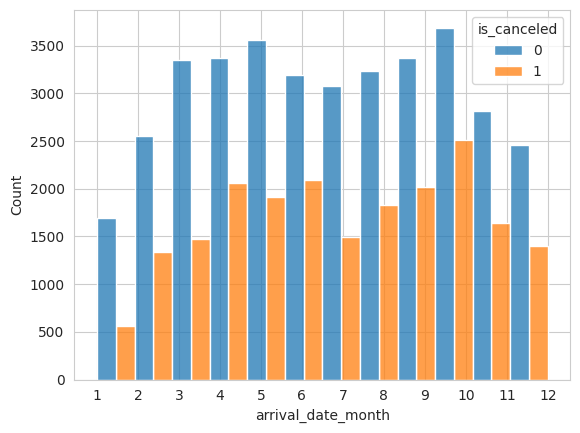

In [107]:
sns.set_style("whitegrid")
sns.histplot(x="arrival_date_month", hue = "is_canceled", multiple = "dodge", data=train, bins = 12)
plt.xticks([1, 2, 3, 4, 5,6,7,8,9,10,11,12])
plt.show()

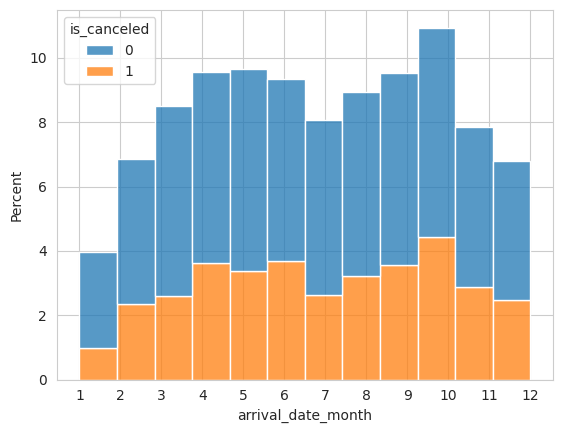

In [108]:
sns.histplot(x="arrival_date_month", hue = "is_canceled", multiple = "stack", stat = "percent", data=train, bins =12)
plt.xticks([1, 2, 3, 4, 5,6,7,8,9,10,11,12])
plt.show()

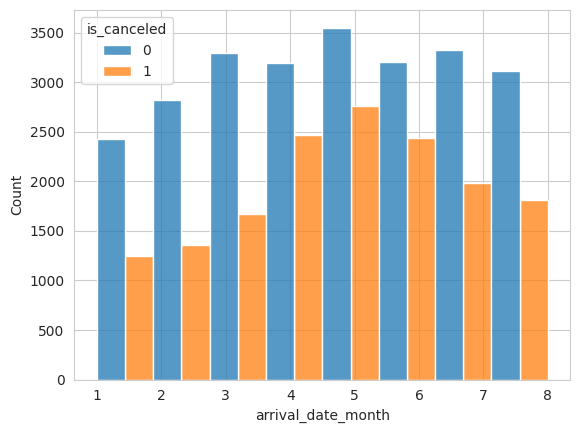

In [109]:
sns.histplot(x="arrival_date_month", hue = "is_canceled", multiple = "dodge",stat = "count", data=test, bins = 8)
plt.show()

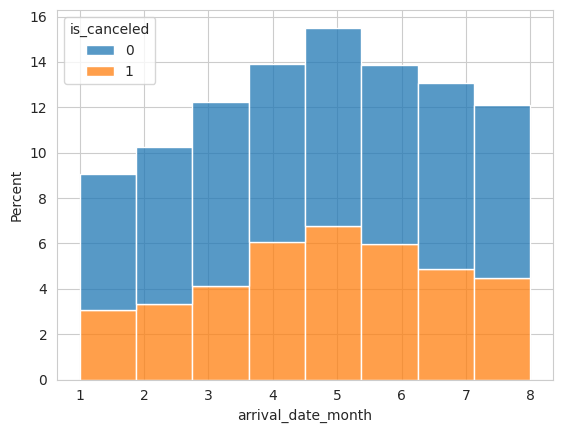

In [125]:
sns.histplot(x="arrival_date_month", hue = "is_canceled", multiple = "stack",stat = "percent", data=test, bins = 8)
plt.show()

In [126]:
media_mesi_tr = train.groupby(train["arrival_date_month"])["is_canceled"].mean()
print(media_mesi_tr)

arrival_date_month
1     0.247776
2     0.343613
3     0.306177
4     0.379698
5     0.349580
6     0.396070
7     0.327865
8     0.360458
9     0.374861
10    0.405288
11    0.367310
12    0.362176
Name: is_canceled, dtype: float64


In [127]:
media_mesi_te = test.groupby(test["arrival_date_month"])["is_canceled"].mean()
print(media_mesi_te)

arrival_date_month
1    0.339582
2    0.325353
3    0.336419
4    0.435082
5    0.437510
6    0.431911
7    0.373424
8    0.368731
Name: is_canceled, dtype: float64


**Risposta n.2.1:**
* I due dataset differiscono per il numero di mesi tenuti in considerazione: il test dataset, infatti, prende in considerazione soltanto i mesi da gennaio a agosto.
* Il mese che ha riscontrato più prenotazioni nel traindataset è quello di ottobre (10% del totale), tuttavia le prenotazioni sembrano abbastanza equamente suddivise, fatta eccezione per gennaio dove si è riscontrato un valore notevolmente più basso in entrambi i dataset (anche se più marcato nel train dove corrisponde al 4%). Nel test dataset si ha poi un aumento non trascurabile di prenotazioni nel mese di maggio (15% del totale), non presente invece nel train.
* La media delle cancellazioni risulta altalentante con valori che si distanziano notevolmente dalla media generale (es: gennaio, nel train dataset, si distanzia di 11 punti percentuali).






# **Domanda n.2.2:**


---
Come si distribuisce il valore relativo alla lunghezza delle prenotazioni nei due hotel? La lunghezza della prenotazione influisce sulla probabilità di cancellazione?



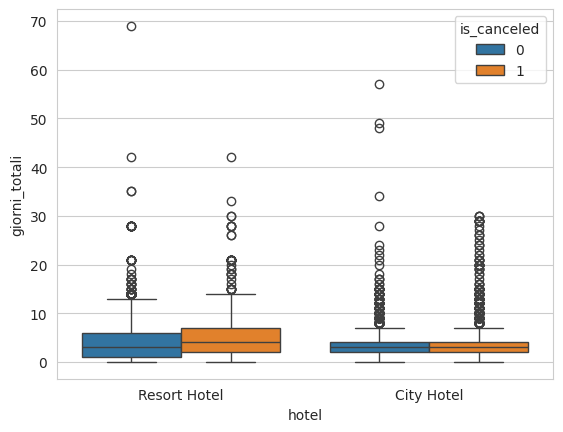

In [111]:
test_non["giorni_totali"] = test_non["stays_in_week_nights"] + test_non["stays_in_weekend_nights"]
train_non["giorni_totali"] = train_non["stays_in_week_nights"] + train_non["stays_in_weekend_nights"]
sns.boxplot(x="hotel", y="giorni_totali", hue = "is_canceled", data=train_non)
plt.show()

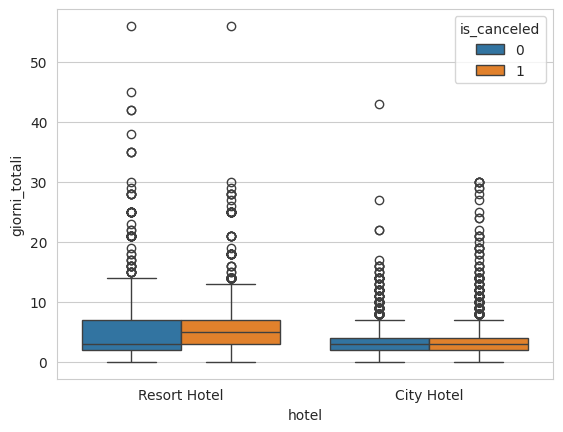

In [112]:
sns.boxplot(x="hotel", y="giorni_totali", hue = "is_canceled", data=test_non)
plt.show()

**Risposta** **n.2**:

---



*   I valori relativi alla durata della prenotazione risultano molto schiacciati, c'è infatti una distanza minima tra i quartili (questo fenomeno è più evidente per le prenotazioni nel "City Hotel").
* La durata delle prenotazioni cancellate e le prenotazioni confermate nel "City Hotel" sono esattamente identiche, mentre per quanto riguarda il "Resort Hotel" le prenotazioni cancellate sembrano essere più lunghe.
* La dispersione dei valori fuori dal terzo quartile è abbastanza ampia.


# **Domanda n.2.3:**
---
Come è distribuito il valore relativo al tipo di stanza assegnato? Questa ha una rilevanza per quanto riguarda le cancellazioni?

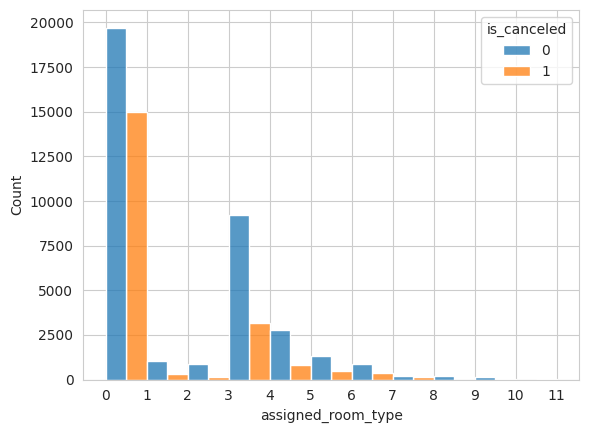

In [151]:
sns.histplot(x="assigned_room_type", hue="is_canceled", data=train, bins=11, multiple="dodge")
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8 ,9 , 10,11])
plt.show()

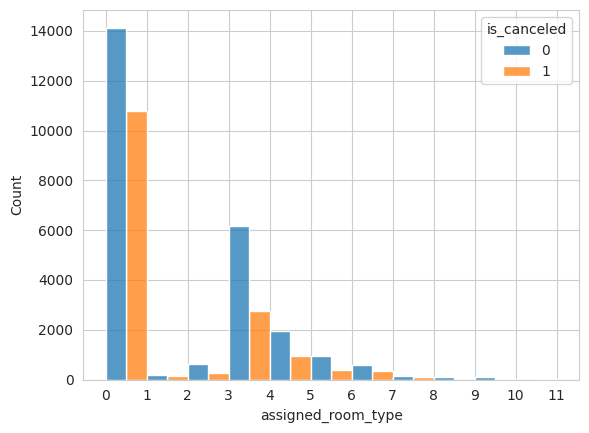

In [152]:
sns.histplot(x="assigned_room_type", hue="is_canceled", data=test, bins=11, multiple="dodge")
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8 ,9 , 10,11])
plt.show()

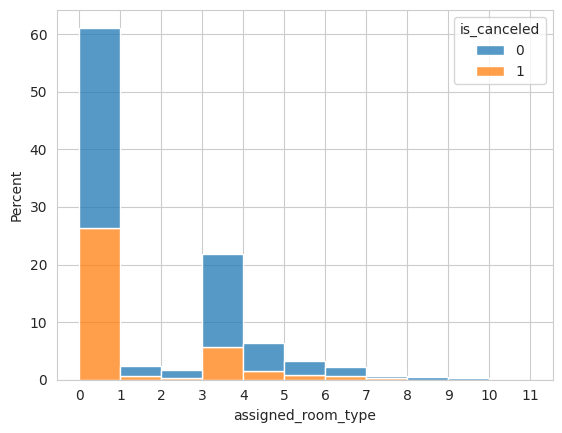

In [157]:
sns.histplot(x="assigned_room_type", hue="is_canceled", data=train, stat = "percent", bins=11, multiple="stack")
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8 ,9 , 10,11])
plt.show()

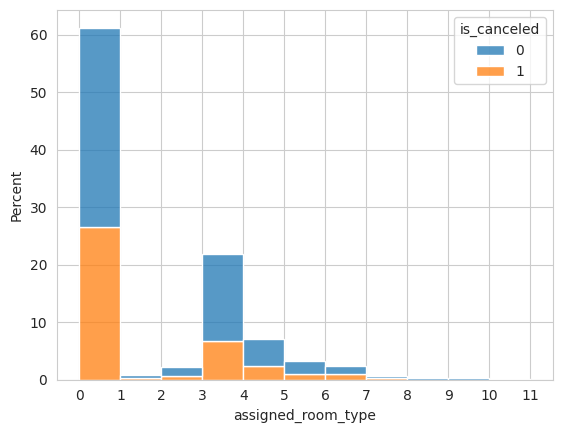

In [158]:
sns.histplot(x="assigned_room_type", hue="is_canceled", data=test, stat = "percent", bins=11, multiple="stack")
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8 ,9 , 10,11])
plt.show()

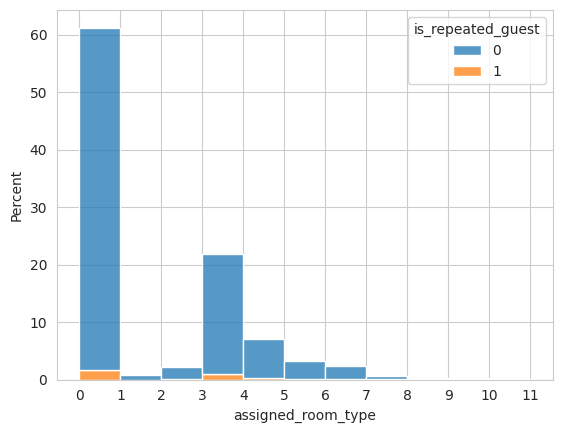

In [169]:
sns.histplot(x="assigned_room_type", hue="is_repeated_guest", data=test, stat = "percent", bins=11, multiple="stack")
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8 ,9 , 10,11])
plt.show()

**Risposta 2.3:**


---




# **Domanda 2.4**:
---
Come si distribuiscono i valori relativi al tipo di pasto prenotato? Questo ha un effetto sul numero delle cancellazioni?

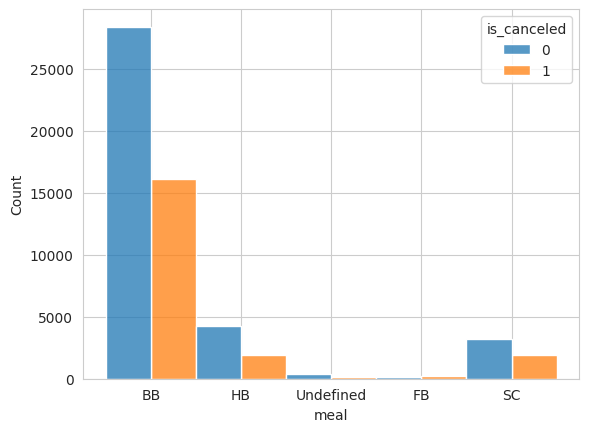

In [159]:
sns.histplot(x="meal", hue = "is_canceled", multiple = "dodge", stat = "count", data=train_non, bins =5)
plt.show()

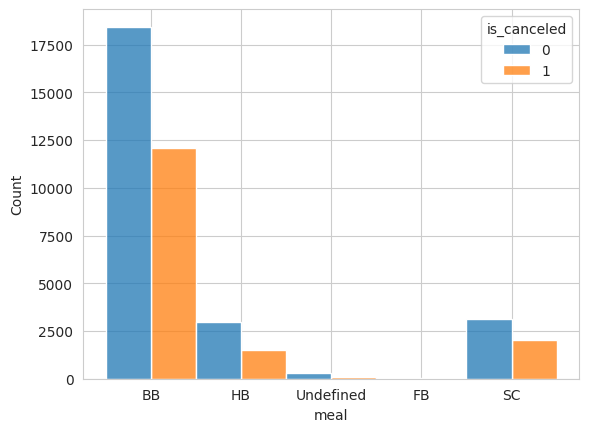

In [160]:
sns.histplot(x="meal", hue = "is_canceled", multiple = "dodge", stat = "count", data=test_non, bins =5)
plt.show()

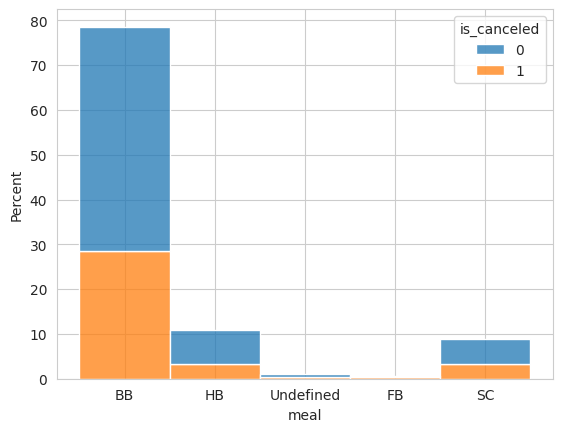

In [162]:
sns.histplot(x="meal", hue = "is_canceled", multiple = "stack", stat = "percent", data=train_non, bins =5)
plt.show()

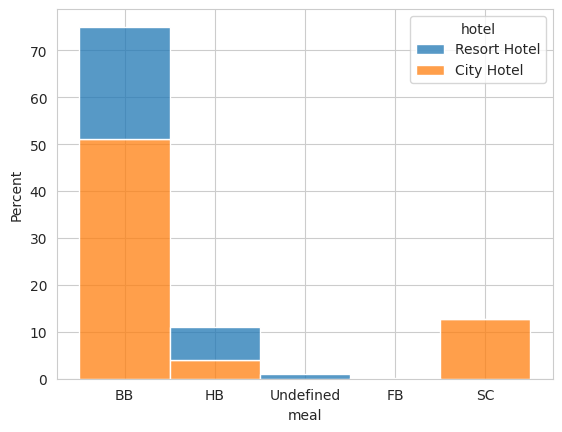

In [164]:
sns.histplot(x="meal", hue = "hotel", multiple = "stack", stat = "percent", data=test_non, bins =5)
plt.show()

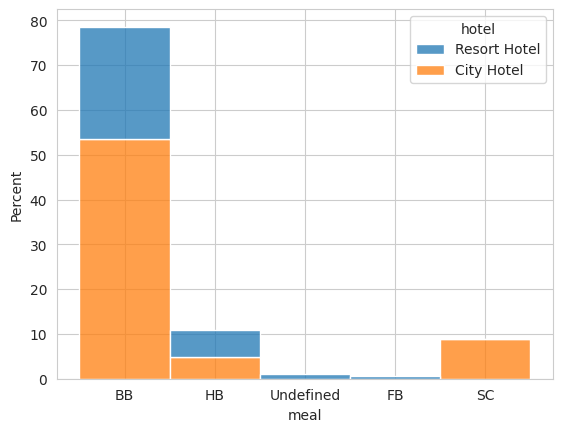

In [165]:
sns.histplot(x="meal", hue = "hotel", multiple = "stack", stat = "percent", data=train_non, bins =5)
plt.show()

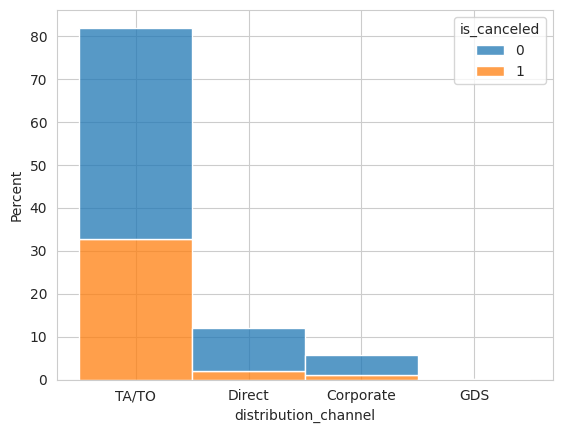

In [161]:
sns.histplot(x="distribution_channel", hue = "is_canceled", multiple = "stack", stat = "percent", data=train_non, bins =8)
plt.show()

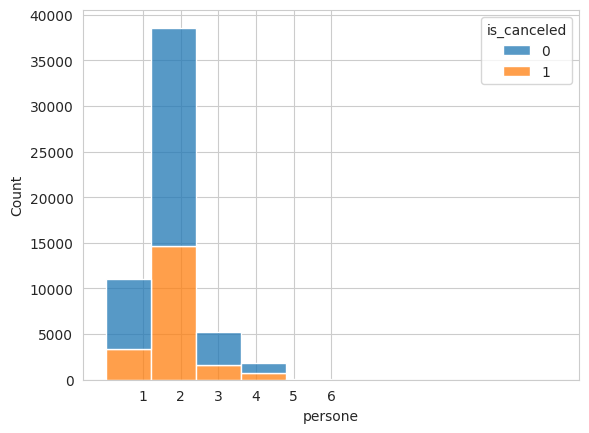

In [119]:
#cancellazioni in base alle persone
sns.histplot(x="persone", hue="is_canceled", multiple="stack", stat="count", data=train, bins = 10)
plt.xticks([1, 2, 3, 4, 5, 6])
plt.show()

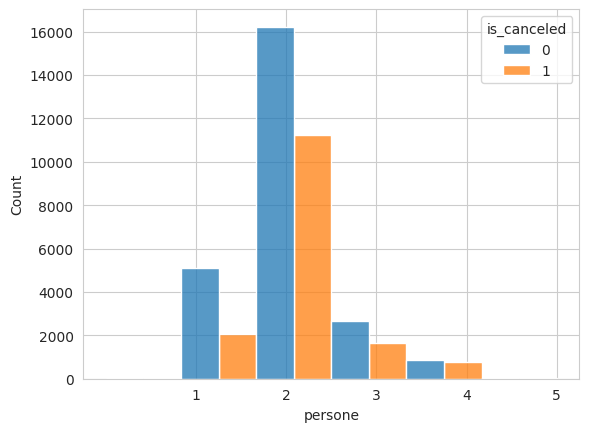

In [120]:
#persone e cancellazioni
sns.histplot(x="persone", hue = "is_canceled", multiple = "dodge", stat = "count", data=test, bins = 6)
plt.xticks([1, 2, 3, 4, 5])
plt.show()

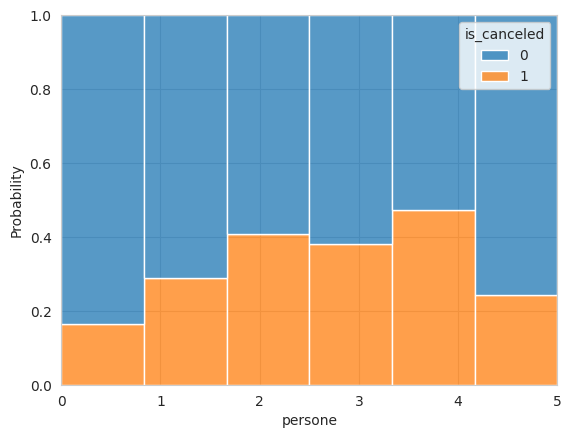

In [121]:
sns.histplot(x="persone", hue = "is_canceled", multiple = "fill", stat = "probability", data=test, bins = 6)
plt.show()

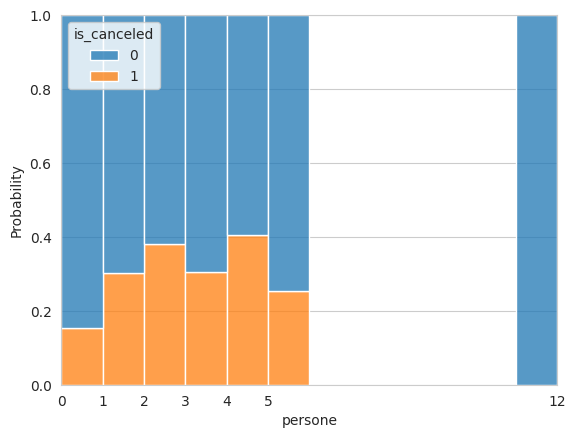

In [122]:
sns.histplot(x="persone", hue = "is_canceled", multiple = "fill", stat = "probability", data=train, bins = 12)
plt.xticks([0, 1, 2, 3, 4, 5, 12])
plt.show()
#togliere il valore 12

Dai grafici si evince molto chiaramente come la stragrande maggioranza delle prenotazioni sia per due persone. La percentuale di cancellazioni si alza notevolemente in corrispondenza di tale dato. Anche le prenotazioni da 4 persone, nonostante i casi siano di molto inferiori presenta una percentuale di cancellazioni molto alta

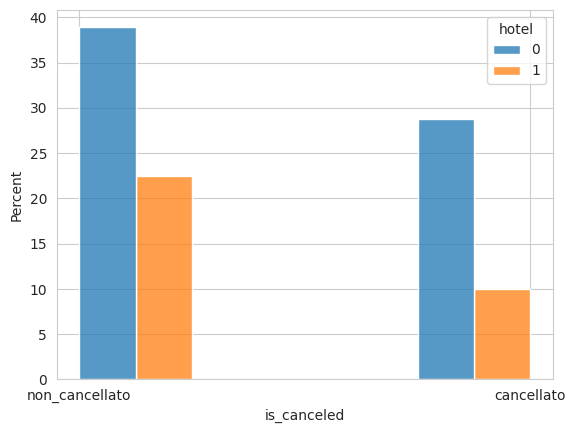

In [137]:
nuovi_nomi_x= ("non_cancellato", "cancellato")
sns.histplot(x="is_canceled", hue = "hotel", multiple = "dodge",stat = "percent", data=test, bins = 4).set(xticks=range(len(nuovi_nomi_x)), xticklabels=nuovi_nomi_x)
plt.xticks([0,1])
plt.show()

# **Fase 3 Machine learning**

In [123]:
train.describe()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,persone,colonna_bambini,prenotazioni_precedenti,giorni_totali
count,56707.000000,56707.000000,56707.000000,56707.0,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000,...,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000,56707.000000
mean,0.327420,0.358633,102.870369,2016.0,6.767313,28.458162,15.911104,0.893981,2.442802,1.850988,...,8.487435,3.833865,2.171302,98.325863,0.068334,0.548645,1.963338,0.112349,0.197930,3.336784
std,0.469276,0.479603,106.582358,0.0,3.194300,13.925493,8.784897,0.983110,1.863548,0.498133,...,47.550647,23.785668,0.477327,49.955696,0.253296,0.761173,0.655733,0.410922,1.749266,2.498863
min,0.000000,0.000000,0.000000,2016.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,17.000000,2016.0,4.000000,17.000000,8.000000,0.000000,1.000000,2.000000,...,-1.000000,0.000000,2.000000,68.530000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,68.000000,2016.0,7.000000,28.000000,16.000000,1.000000,2.000000,2.000000,...,-1.000000,0.000000,2.000000,90.950000,0.000000,0.000000,2.000000,0.000000,0.000000,3.000000
75%,1.000000,1.000000,160.000000,2016.0,10.000000,41.000000,24.000000,2.000000,3.000000,2.000000,...,-1.000000,0.000000,2.000000,120.000000,0.000000,1.000000,2.000000,0.000000,0.000000,4.000000
max,1.000000,1.000000,709.000000,2016.0,12.000000,53.000000,31.000000,19.000000,50.000000,4.000000,...,499.000000,391.000000,3.000000,5400.000000,3.000000,5.000000,12.000000,10.000000,64.000000,69.000000


In [124]:
print(test.isnull().sum())
print(train.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         